In [4]:
from mcdm import *
import numpy as np
import pandas as pd

## 1. Get the decision matrix $C$ of each attributes(presision, recall, F1 score.etc)

In [5]:
#the models are pretrained based on different cross entropy weights

model_paths = ['vgg19_1.pth',
              'resnet50_1.pth',
               'resnet50_2.pth']
# Select the different model for predictions
df = pd.read_excel("validation_probabilities_lists.xlsx")
selected_columns = [col for col in df.columns if any(path in col for path in model_paths)]
df_subset = df[selected_columns]
true_labels = df['label']




## 2. Find weights of decison makers

In [6]:

# Step 1: Calculate metrics for precision, recall, and F1 score
metrics_df = calculate_metrics(df_subset, true_labels, model_paths)

# Step 2: Filter metrics for class == 1 which is the leakage class
metrics_class_1 = metrics_df[metrics_df['Class'] == 1]

# Step 3: Create the index matrix for class == 1
index_matrix_class = np.array([
    metrics_class_1['Accuracy'].values,
    metrics_class_1['Recall'].values,
    metrics_class_1['F1_score'].values,
])

# Step 4: Calculate decision-maker weights
dm_weights = calculate_decision_maker_weights(index_matrix_class)

# Step 5: Print the decision-maker weights
print("Criteria Weights:", dm_weights)


Criteria Weights: [0.33048362 0.33829976 0.33121662]


In [7]:
# Apply TOPSIS to rank alternatives based on the metrics and decision-maker weights
ranked_indices,topsis_scores = topsis(index_matrix_class.transpose(), dm_weights)
print(topsis_scores)


[0.58999893 0.26377743 0.14622364]


## 3. Uncertainty Analysis

In [8]:
#generate probabilities samples of each test data
#The excel files are use intermediate results of the MC_dropout Data of each model for T= 30 times
model_paths = [
               'model1.xlsx',
               'model2.xlsx',
               'model3.xlsx',
              ]



----------------------------------------------------------------------------------------------------

t statisitc test


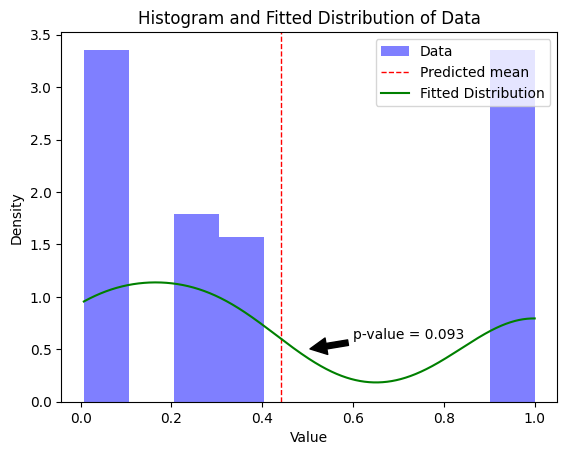

predict average: 0.44231186542814227
Null Hypothesis (Threshod to determine if the co2 is leaking): 0.5
t-statistic: -1.3314952966234452
p-value: 0.09321321651603695
####################################################################################################
The average is not significantly less than 0.5, we cannot determine if the CO2 is leaking
####################################################################################################
----------------------------------------------------------------------------------------------------


In [10]:
# The input is the prediction results of 3 different models
data = pd.read_excel("test_classifier_lists_3.xlsx")

pred, accuracy, precision,recall,  f1_score, f2_score = get_model_performance(data, weights = topsis_scores, threshold = 0.5)

index = 35
if pred[index] == 1:
  print("predict:", pred[index])
  pass

else:
  # print("predict:", pred[index])
  # print("-" * 100)

  # print("w test")
  data_prob = probability_samples(model_paths, topsis_scores, index)


  # return test_average_significance_t(data_prob*weights*len(weights), threshold, alpha)
  print("-" * 100)
  print()
  print("t statisitc test")
  data_prob = np.array(data_prob)


  test_average_significance_t(data_prob, 0.5, 0.0001)
print("-" * 100)
